# Project: World CO2 Emissions #

## Contents
  * [1. Imports](#1)
  * [2 Load data](#2)
  * [3. How the global CO2 emission has changed in the history?](#3)
  * [4. Which countries have the leading CO2 emission in 2022?](#4)
  * [5. What is the historical trend of CO2 emission of China, US, and India, which have the largest CO2 emission in 2022?](#5)
  * [6. What to explore next?](#6)

## 1. Imports<a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load data<a id='2'></a>

The data is downloaded from: https://github.com/owid/co2-data.

In [2]:
# Data source: https://github.com/owid/co2-data
datafile = 'owid-co2-data.csv'
df = pd.read_csv(datafile)
df = df[['country','year','iso_code','population','co2','co2_per_capita']]

## 3. How the global CO2 emission has changed in the history?<a id='3'></a>

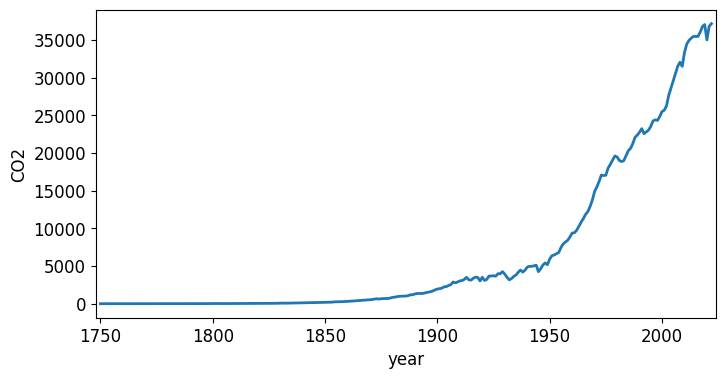

In [3]:
world = df[df['country'] == 'World']

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('CO2',fontsize=12)
xmin, xmax = min(world.year)-2, max(world.year)+2
ax.set_xlim(xmin,xmax)
ax.tick_params(axis='both', labelsize=12)
ax.plot(world.year,world.co2,linewidth=2)
fig.show()

### Findings: 
- Global CO2 emission remained at a low-level before the Industrial Evolution around 1850. 
- Since then, global CO2 emission increased fastly, especially in the 20 century.
- Global CO2 emission seems to be slowing down in the recent decades, apparently due to efforts towards reducing CO2 emission.

## 4. Which countries have the leading CO2 emission in 2022?<a id='4'></a>

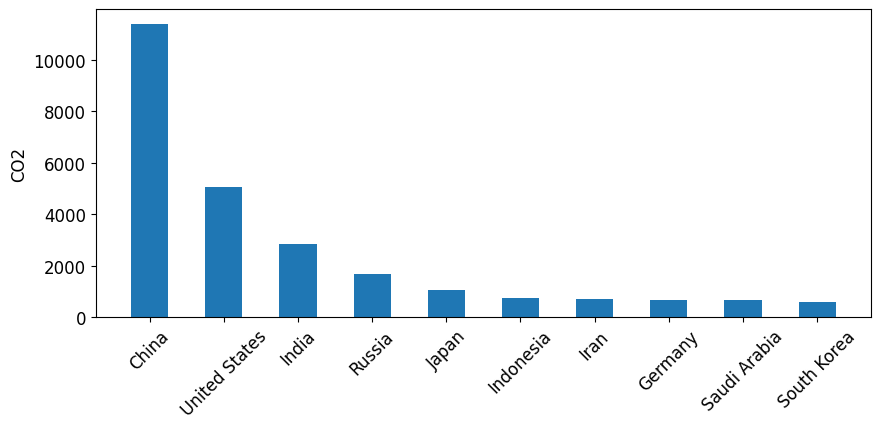

In [4]:
co2_2022 = df[df['year'] == 2022]   # Select 2022
co2_2022 = co2_2022[co2_2022['iso_code'].notna()] # Remove countries with missing iso_code

num_country = 10
co2_2022_total = co2_2022.sort_values('co2',ascending=False).iloc[0:num_country]
co2_2022_capita = co2_2022.sort_values('co2_per_capita',ascending=False).iloc[0:num_country]

fig = plt.figure(figsize=(10,4))
ax = plt.axes()
ax.set_ylabel('CO2',fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.bar(co2_2022_total.country,co2_2022_total.co2, width=0.5)
fig.show()

### Finding:
- China has the largest CO2 emission in 2022, followed by United States, India, Russia and Japan among others.
- CO2 emission in China is two times larger than in the United States, and more than three times larger than in India.

## 5. What is the historical trend of CO2 emission of China, US, and India, which have the largest CO2 emission in 2022?<a id='5'></a>

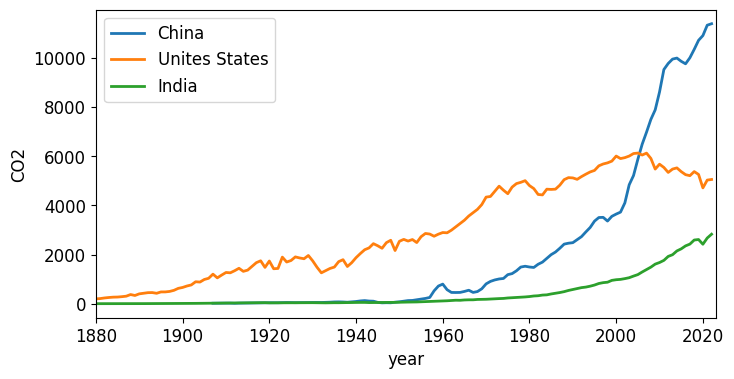

In [5]:
co2_China = df[df['country'] == 'China']
co2_US = df[df['country'] == 'United States']
co2_India = df[df['country'] == 'India']

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('CO2',fontsize=12)
xmin, xmax = 1880, 2023
ax.set_xlim(xmin,xmax)
ax.tick_params(axis='both', labelsize=12)
ax.plot(co2_China.year,co2_China.co2, co2_US.year,co2_US.co2, co2_India.year,co2_India.co2, linewidth=2)
ax.legend(['China','Unites States','India'],fontsize=12,loc='upper left')
fig.show()

### Findings:
- United States' CO2 emission started to increase earlier than China and India, but it stablized and slightly decrease after 2000.
- From 1960, China's CO2 emission increased fastly and surpassed United State's emission in around 2005.
- India's CO2 emission has been increasing with a faster pace than China and United States within the past two decades.

## 6. What to explore next?<a id='6'></a>

- What is each contry's proportional contribution to global CO2 emission?
- How has the contribution evolved in history?
- Has the contribution has any relationship to the country's GDP and population?